In [22]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [67]:
#Defining initial conditions and parameters
E_tot = 10 #Will become random energy generated from boltzmann dist
k0 = 0.05
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_tot/k0)**(1/2) * sp.cos(phi)
v0 = (2*E_tot/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print((2*E_tot/k0)**(1/2), (2*E_tot/m)**(1/2))
print(u0)

20.0 3.1622776601683795
[-1.89473274 -3.14805491]


In [68]:
def k(t):
    k = k0 + 2*t
    return k

In [69]:
#Defining equation for SHM in system of equations
#Note switched so that these are not dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-(k(t)/m)*x)

In [70]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
t = sp.linspace(0,20,201)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


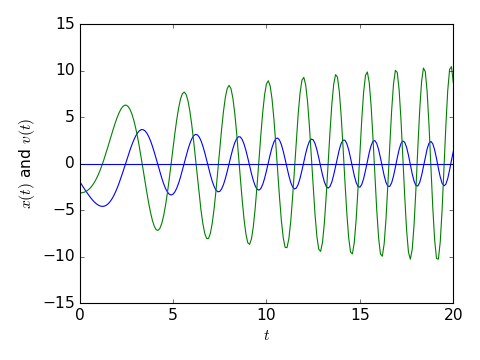

In [71]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [72]:
#Check to make sure equal to u0
print([sp.amax(x),sp.amax(v)])

[3.6699098747858514, 10.447998520634666]


In [74]:
#Calculating energy at each time step
for i in range (0,201):
    Energy = 1/2*m*v[i]**2 + 1/2*k(t)*x[i]**2
    print(Energy)

[ 10.          10.35900121  10.71800243  11.07700364  11.43600486
  11.79500607  12.15400728  12.5130085   12.87200971  13.23101093
  13.59001214  13.94901336  14.30801457  14.66701578  15.026017
  15.38501821  15.74401943  16.10302064  16.46202185  16.82102307
  17.18002428  17.5390255   17.89802671  18.25702792  18.61602914
  18.97503035  19.33403157  19.69303278  20.05203399  20.41103521
  20.77003642  21.12903764  21.48803885  21.84704007  22.20604128
  22.56504249  22.92404371  23.28304492  23.64204614  24.00104735
  24.36004856  24.71904978  25.07805099  25.43705221  25.79605342
  26.15505463  26.51405585  26.87305706  27.23205828  27.59105949
  27.9500607   28.30906192  28.66806313  29.02706435  29.38606556
  29.74506678  30.10406799  30.4630692   30.82207042  31.18107163
  31.54007285  31.89907406  32.25807527  32.61707649  32.9760777
  33.33507892  33.69408013  34.05308134  34.41208256  34.77108377
  35.13008499  35.4890862   35.84808742  36.20708863  36.56608984
  36.92509106